In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# create a set of random long lat combinations
lats = np.random.uniform(-90,90,size=1500)
lngs = np.random.uniform(-90,90,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
#unpack zip into list
coordinates = list(lat_lngs)

In [10]:
# use print function to display the lat and long combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

84.37413388020772 -79.76274802066716
-82.30138713868791 85.20210057006832
-39.295633720995156 38.04793010131908
-39.147982350707466 -82.32098316161746
52.5154718747348 36.330467985407324
27.491714045349894 -14.415356304002117
-24.309893056793584 -39.7427706032724
-62.20175865802112 38.42002971454144
7.638491798963912 32.79719858933467
58.69112006267531 -37.267905976635454
-30.033229344337073 -84.7899589104515
-88.55955425845487 -77.13432931522328
-70.57190502046403 69.60529732276942
-52.953709238631625 60.63955520607101
-60.63473682869664 77.51976014175418
54.56968644037195 -74.33026890649735
-22.376730567476642 -2.3287358190872283
-88.74681897307879 -61.71291220379551
62.47933035408329 75.10417138779616
0.679226854152077 74.99546285243133
-53.74428470767425 -58.84929548440572
17.969373530669287 24.52882231770667
-67.04517573860389 21.981023993101417
-85.57194466735223 -62.58103887087505
18.951014212960473 -8.818509939361277
-7.458127018359875 -61.35921540754937
-81.8140219750266 73.07

60.39041109966794 55.67705069992954
-34.67527753618845 73.98157735249254
61.10392030478147 -16.96691781368716
-19.494912642669988 27.08109108559222
-37.536670941607795 -9.937506346681118
-20.755754822551566 42.24274593009221
-11.016835442221407 38.74340794975737
-8.787851217205898 -52.814174908249576
-77.96896762279157 39.42492665164531
67.50218615341336 -3.3331955927414185
83.33202107569457 73.0256604452673
37.800302461647675 55.1930028825596
82.99306125336608 87.67437273048876
42.37870140620137 -6.6111707307186265
-25.587645606263905 -27.946438630521428
46.90344529095714 20.718000861647695
-29.24244250654465 56.51226823834051
-58.021756205358585 -26.474932498946337
14.443603805951014 -63.517664951368715
-39.12122298528513 60.23256123404306
74.58591132882918 75.72020801563212
62.92082885225852 25.94367452270734
-39.31052927741891 -11.873489326813768
21.723549343135574 -36.05084523448496
-14.411878293938898 -65.29499678641163
-1.7874082465274768 80.35812477991647
-76.27769392791224 58.

In [11]:
#import citipy
from citipy import citipy


In [12]:
# create list to hold cities closest to coordinates
cities = []

# identify nearest city to lat long combos
for coordinate in coordinates:
    city= citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then add to list
    if city not in cities:
        cities.append(city)

#print city count
len(cities)

613

In [13]:
#import requests library
import requests

#import API key
from config import weatherAPI_key


In [14]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherAPI_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9eae8ae74d90e1ab199dc83caac75f4b


In [15]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [16]:
#create empty list to hold weather data
city_data = []

#print the start of logging
print("Beginning Data Retrieval      ")
print("------------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#run api request for each city

Beginning Data Retrieval      
------------------------------
Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | margate
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | glazunovka
Processing Record 6 of Set 1 | aguimes
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | gambela
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | chapais
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | noyabrsk
Processing Record 18 of Set 1 | viligili
City not found. Skipping...
Processing Record 19 of Set 1 | kutum
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | nioro
Processing Record 22 of Set 1

Processing Record 37 of Set 4 | bubaque
Processing Record 38 of Set 4 | hobyo
Processing Record 39 of Set 4 | nouadhibou
Processing Record 40 of Set 4 | bugulma
Processing Record 41 of Set 4 | kalangala
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | mtama
Processing Record 45 of Set 4 | marsh harbour
Processing Record 46 of Set 4 | pemba
Processing Record 47 of Set 4 | nador
Processing Record 48 of Set 4 | abha
Processing Record 49 of Set 4 | krasnoselkup
Processing Record 50 of Set 4 | gubkinskiy
Processing Record 1 of Set 5 | rawson
Processing Record 2 of Set 5 | beloha
Processing Record 3 of Set 5 | nilagiri
Processing Record 4 of Set 5 | brae
Processing Record 5 of Set 5 | havre-saint-pierre
Processing Record 6 of Set 5 | bambui
Processing Record 7 of Set 5 | abu dhabi
Processing Record 8 of Set 5 | kuurne
Processing Record 9 of Set 5 | belmonte
Processing Record 10 of Set 5 | trelleborg
Processing Record 11

Processing Record 30 of Set 8 | boyuibe
Processing Record 31 of Set 8 | rochester
Processing Record 32 of Set 8 | porangatu
Processing Record 33 of Set 8 | saint anthony
Processing Record 34 of Set 8 | conceicao do araguaia
Processing Record 35 of Set 8 | kharitonovo
Processing Record 36 of Set 8 | kormilovka
Processing Record 37 of Set 8 | carnarvon
Processing Record 38 of Set 8 | port blair
Processing Record 39 of Set 8 | chardara
Processing Record 40 of Set 8 | taoudenni
Processing Record 41 of Set 8 | surskoye
Processing Record 42 of Set 8 | shambu
Processing Record 43 of Set 8 | viedma
Processing Record 44 of Set 8 | talara
Processing Record 45 of Set 8 | ulagan
Processing Record 46 of Set 8 | chiredzi
Processing Record 47 of Set 8 | uvira
Processing Record 48 of Set 8 | sambava
Processing Record 49 of Set 8 | sur
Processing Record 50 of Set 8 | zyryanovsk
Processing Record 1 of Set 9 | ogre
Processing Record 2 of Set 9 | pinhao
Processing Record 3 of Set 9 | saint-francois
Proces

Processing Record 18 of Set 12 | louisbourg
City not found. Skipping...
Processing Record 19 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 20 of Set 12 | onega
Processing Record 21 of Set 12 | jambol
City not found. Skipping...
Processing Record 22 of Set 12 | bristol
Processing Record 23 of Set 12 | mysen
Processing Record 24 of Set 12 | shepsi
Processing Record 25 of Set 12 | lansing
Processing Record 26 of Set 12 | domoni
Processing Record 27 of Set 12 | kleive
Processing Record 28 of Set 12 | muscat
Processing Record 29 of Set 12 | san rafael
Processing Record 30 of Set 12 | arcachon
Processing Record 31 of Set 12 | westerland
Processing Record 32 of Set 12 | pesaro
Processing Record 33 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 34 of Set 12 | ormara
Processing Record 35 of Set 12 | jiwani
Processing Record 36 of Set 12 | adre
Processing Record 37 of Set 12 | vestmanna
Processing Record 38 of Set 12 | ratnagiri
Processing Record 39 of 

In [17]:
#convert array to panda df
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,100,GL,2022-10-14 15:02:24,96,77.4840,-69.3632,23.22,7.45
1,Busselton,25,AU,2022-10-14 15:02:25,91,-33.6500,115.3333,50.95,7.40
2,Margate,100,GB,2022-10-14 15:02:22,78,51.3813,1.3862,61.70,1.99
3,Lebu,19,CL,2022-10-14 15:02:26,73,-37.6167,-73.6500,54.97,16.98
4,Glazunovka,58,RU,2022-10-14 15:02:27,63,52.4986,36.3275,43.65,3.80
5,Aguimes,40,ES,2022-10-14 15:02:28,65,27.9054,-15.4461,75.83,31.07
6,Arraial Do Cabo,12,BR,2022-10-14 15:02:28,83,-22.9661,-42.0278,73.92,17.09
7,Port Alfred,99,ZA,2022-10-14 15:02:29,92,-33.5906,26.8910,65.17,4.00
8,Gambela,100,ET,2022-10-14 15:02:29,79,8.2500,34.5833,79.88,0.89
9,Tasiilaq,0,GL,2022-10-14 15:02:29,63,65.6145,-37.6368,32.16,9.13


In [18]:
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
city_d_df = city_data_df[column_order]

In [20]:
city_d_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaanaaq,GL,2022-10-14 15:02:24,77.4840,-69.3632,23.22,96,100,7.45
1,Busselton,AU,2022-10-14 15:02:25,-33.6500,115.3333,50.95,91,25,7.40
2,Margate,GB,2022-10-14 15:02:22,51.3813,1.3862,61.70,78,100,1.99
3,Lebu,CL,2022-10-14 15:02:26,-37.6167,-73.6500,54.97,73,19,16.98
4,Glazunovka,RU,2022-10-14 15:02:27,52.4986,36.3275,43.65,63,58,3.80
5,Aguimes,ES,2022-10-14 15:02:28,27.9054,-15.4461,75.83,65,40,31.07
6,Arraial Do Cabo,BR,2022-10-14 15:02:28,-22.9661,-42.0278,73.92,83,12,17.09
7,Port Alfred,ZA,2022-10-14 15:02:29,-33.5906,26.8910,65.17,92,99,4.00
8,Gambela,ET,2022-10-14 15:02:29,8.2500,34.5833,79.88,79,100,0.89
9,Tasiilaq,GL,2022-10-14 15:02:29,65.6145,-37.6368,32.16,63,0,9.13


In [21]:
#output csv file
output_data_file = "weather_data/cities.csv"
#export city data to csv
city_d_df.to_csv(output_data_file, index_label="City_ID")


In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_d_df["Lat"]
max_temps = city_d_df["Max Temp"]
humidity = city_d_df["Humidity"]
cloudiness = city_d_df["Cloudiness"]
wind_speed = city_d_df["Wind Speed"]

In [23]:
#import time module
import time
#get todays date in seconds
today = time.time()
today

1665760677.2943356

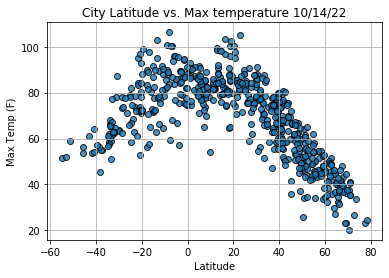

In [24]:
plt.scatter(lats, max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Max temperature " + time.strftime("%x"))
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig1.png")

plt.show()

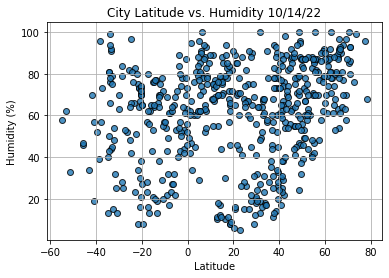

In [25]:
plt.scatter(lats, humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig2.png")

plt.show()

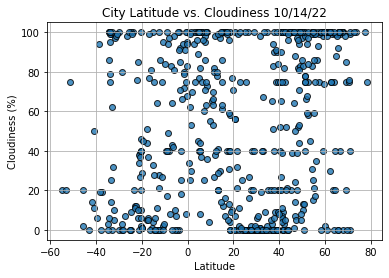

In [26]:
plt.scatter(lats, cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig3.png")

plt.show()

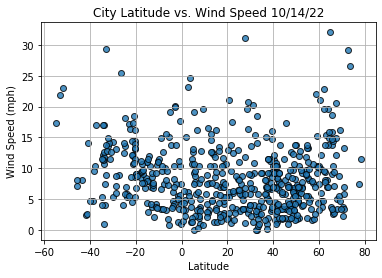

In [27]:
plt.scatter(lats, wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=.8, label="Cities")
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("weather_data/Fig4.png")

plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
northern_hemi_df = city_d_df.loc[(city_d_df["Lat"]>=0)]
southern_hemi_df = city_d_df.loc[(city_d_df["Lat"]<0)]

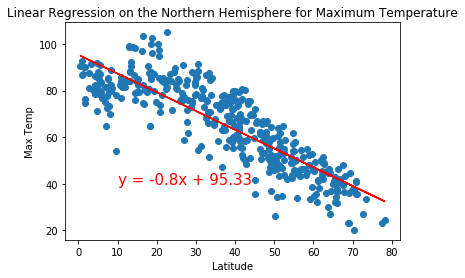

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

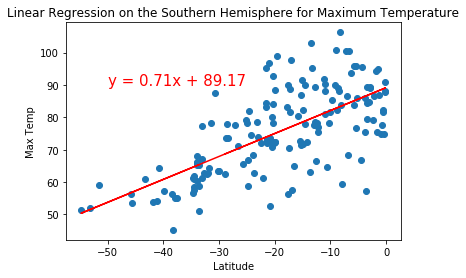

In [31]:
# lin reg for Southern Hemi
x_values= southern_hemi_df["Lat"]
y_values= southern_hemi_df["Max Temp"]
#call function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp', (-50,90))

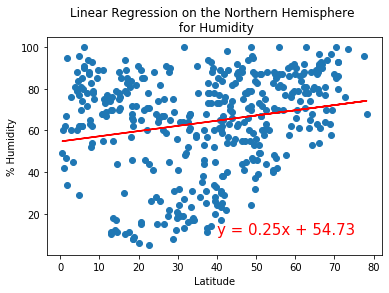

In [32]:
# humidity in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Humidity', '% Humidity', (40,10))

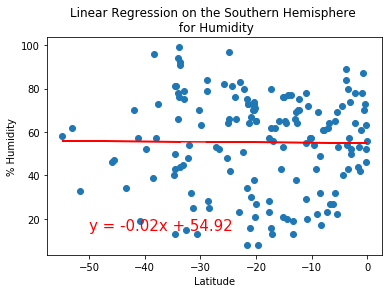

In [33]:
# lin reg on southern hemi 4 humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Humidity', '% Humidity', (-50,15))

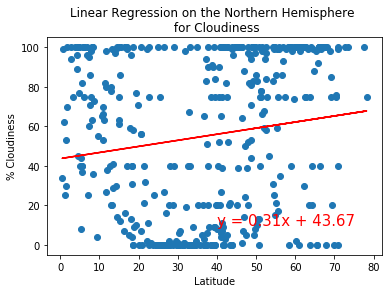

In [34]:
#cloudiness in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Cloudiness', '% Cloudiness', (40,10))

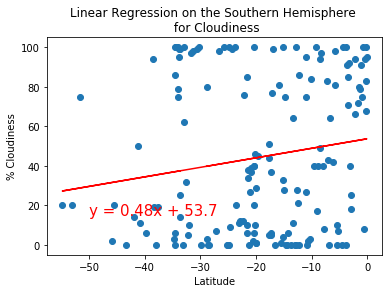

In [35]:
# lin reg on southern hemi 4 clooud
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Cloudiness', '% Cloudiness', (-50,15))

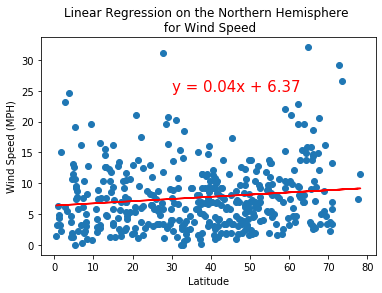

In [36]:
#Wind Speed in northern hemi
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#call function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)', (30,25))

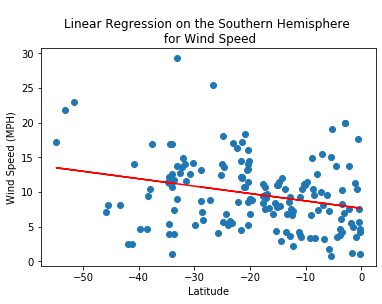

In [37]:
# lin reg on southern hemi 4 wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#call functinon
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (MPH)', (-30,35))

In [38]:
import gmaps

In [39]:
min_temp = float(input("What is the minimum temperature you would like for your trip?"))
max_temp = float(input("What is the maximum temperature you would like for your trip?"))

What is the minimum temperature you would like for your trip?75
What is the maximum temperature you would like for your trip?90


In [40]:
preferred_cities_df = city_d_df.loc[(city_d_df["Max Temp"] <= max_temp)&(city_d_df["Max Temp"]>=min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
5,Aguimes,ES,2022-10-14 15:02:28,27.9054,-15.4461,75.83,65,40,31.07
8,Gambela,ET,2022-10-14 15:02:29,8.2500,34.5833,79.88,79,100,0.89
16,Kutum,SD,2022-10-14 15:02:33,14.2000,24.6667,86.79,17,30,10.36
19,Manicore,BR,2022-10-14 15:02:34,-5.8092,-61.3003,83.95,65,98,1.72
23,Ribeira Grande,PT,2022-10-14 15:02:35,38.5167,-28.7000,77.40,73,75,9.22
26,Binga,ZW,2022-10-14 15:02:37,-17.6203,27.3414,89.91,23,5,8.46
30,Lucea,JM,2022-10-14 15:02:39,18.4510,-78.1736,84.85,65,100,2.80
34,Hithadhoo,MV,2022-10-14 15:02:41,-0.6000,73.0833,82.17,70,8,17.58
35,Victoria,HK,2022-10-14 15:00:29,22.2855,114.1577,80.65,78,11,5.99
36,Georgetown,MY,2022-10-14 15:02:04,5.4112,100.3354,83.23,85,40,0.00


In [41]:
preferred_cities_df.isnull().sum()

City          0
Country       0
Date          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
dtype: int64

In [42]:
hotel_df = preferred_cities_df[["City","Country","Max Temp","Lat","Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head()

,City,Country,Max Temp,Lat,Lng,Hotel Name
5,Aguimes,ES,75.83,27.9054,-15.4461,
8,Gambela,ET,79.88,8.2500,34.5833,
16,Kutum,SD,86.79,14.2000,24.6667,
19,Manicore,BR,83.95,-5.8092,-61.3003,
23,Ribeira Grande,PT,77.40,38.5167,-28.7000,
